# Comprehensive Regression Workflow: Predicting House Prices

## Introduction

In this notebook, we will undertake a comprehensive regression analysis using the Car Price dataset from Kaggle. 
The primary goal is to build a robust model capable of predicting car prices based on various features such as engine size, horsepower, and brand.

This workflow will guide you through each step of the process, including:

- **Data Exploration**: Understanding the structure of the dataset and identifying key patterns.
- **Preprocessing**: Handling missing values, encoding categorical variables, and scaling features.
- **Feature Engineering**: Creating new features or modifying existing ones to enhance model performance.
- **Model Selection**: Comparing different regression algorithms and selecting the best one for the task.
- **Evaluation**: Assessing model performance using appropriate metrics like RMSE and R-squared.



# Table of Contents
1. [Data Exploration](#sec1)
    * [1.2 Univariate Analysis](#sec1.1)  
    * [1.3 Bi-variate Analysis](#sec1.2)  
2. [Preprocessing](#sec2)  
    * [2.1 Removing redundant features](#sec2.1)
    * [2.2 Dealing with Outliers](#sec2.2)
    * [2.3 Filling Missing Values](#sec2.3)
3. [Feature Engineering](#sec3)
4. [Modeling](#sec4)
    * [4.1 Scaling of features](#sec4.1)
    * [4.2 Selecting Algorithms](#sec4.2)

### Import necessary libraries

In [1]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries for data manipulation and visualization
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
from scipy import stats  # Import stats module for Z-score
import matplotlib.pyplot as plt  # For plotting data
import seaborn as sns  # For enhanced data visualizations
from scipy import stats # For statistics

# Import libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling numerical data and encoding categorical data
from sklearn.linear_model import LinearRegression, ElasticNet  # For linear Regression
from sklearn.tree import DecisionTreeRegressor  # For Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor  # For Random Forest Regression
from sklearn.svm import SVR  # For Support Vector Regression 
import xgboost as xgb # For XGBoost Regression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer  # For model evaluation metrics


# Set visual settings for plots (optional)
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.rcParams['figure.figsize'] = [10, 6]

# Display libraries that were imported
print("Libraries imported successfully!")

Libraries imported successfully!


<a id="sec1"></a>
## [1. Data Exploration](#sec1)

In [3]:
# Load the dataset
df = pd.read_csv('house_prices.csv')

# Set option to display all the columns
pd.set_option("display.max_columns", None)

# To use just a sample of the dataset for speed
df = df.sample(100, random_state=42)

# Display the first few rows of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,6,8,1963,2003,Hip,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,GLQ,663,Unf,0,396,1059,GasA,TA,Y,SBrkr,1068,0,0,1068,0,1,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1963.0,RFn,1,264,TA,TA,Y,192,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1994,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,362.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1032,Unf,0,431,1463,GasA,Ex,Y,SBrkr,1500,1122,0,2622,1,0,2,1,3,1,Gd,9,Typ,2,TA,Attchd,1994.0,RFn,2,712,TA,TA,Y,186,32,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
413,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,6,1927,1950,Gable,CompShg,WdShing,Wd Shng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,Gd,Y,FuseA,1028,0,0,1028,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1927.0,Unf,2,360,TA,TA,Y,0,0,130,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
522,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
1036,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,70.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1022,Unf,0,598,1620,GasA,Ex,Y,SBrkr,1620,0,0,1620,1,0,2,0,2,1,Ex,6,Typ,1,Ex,Attchd,2008.0,Fin,3,912,TA,TA,Y,228,0,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500


In [ ]:
# Display a concise summary of the dataframe, including the number of non-null entries and the data type of each column
df.info()

- Already we can note that there are some columns with way too many missing values. 
- We can drop them now but let's wait and see if they have a case

In [ ]:
# Summary statistics of numerical columns
df.describe()

In [ ]:
# Summary statistics of categorical columns
df.describe(include = 'object')

In [4]:
# We'll convert MSSubClass to object as it's a categorical data according to the  data description
df["MSSubClass"] = df["MSSubClass"].astype("object")
df[["MSSubClass"]].describe(include = "object")

,MSSubClass
count,100
unique,10
top,20
freq,41


<a id="sec1.1"></a>
### [1.1 Univariate Analysis](#sec1.1)

##### Univariate analysis involves analyzing individual features one at a time. This helps to understand the distribution, central tendency, and variability of each feature.

##### For numerical features

In [5]:
numerical_features = df.select_dtypes(include='number').columns
numerical_features

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
len(numerical_features)

37

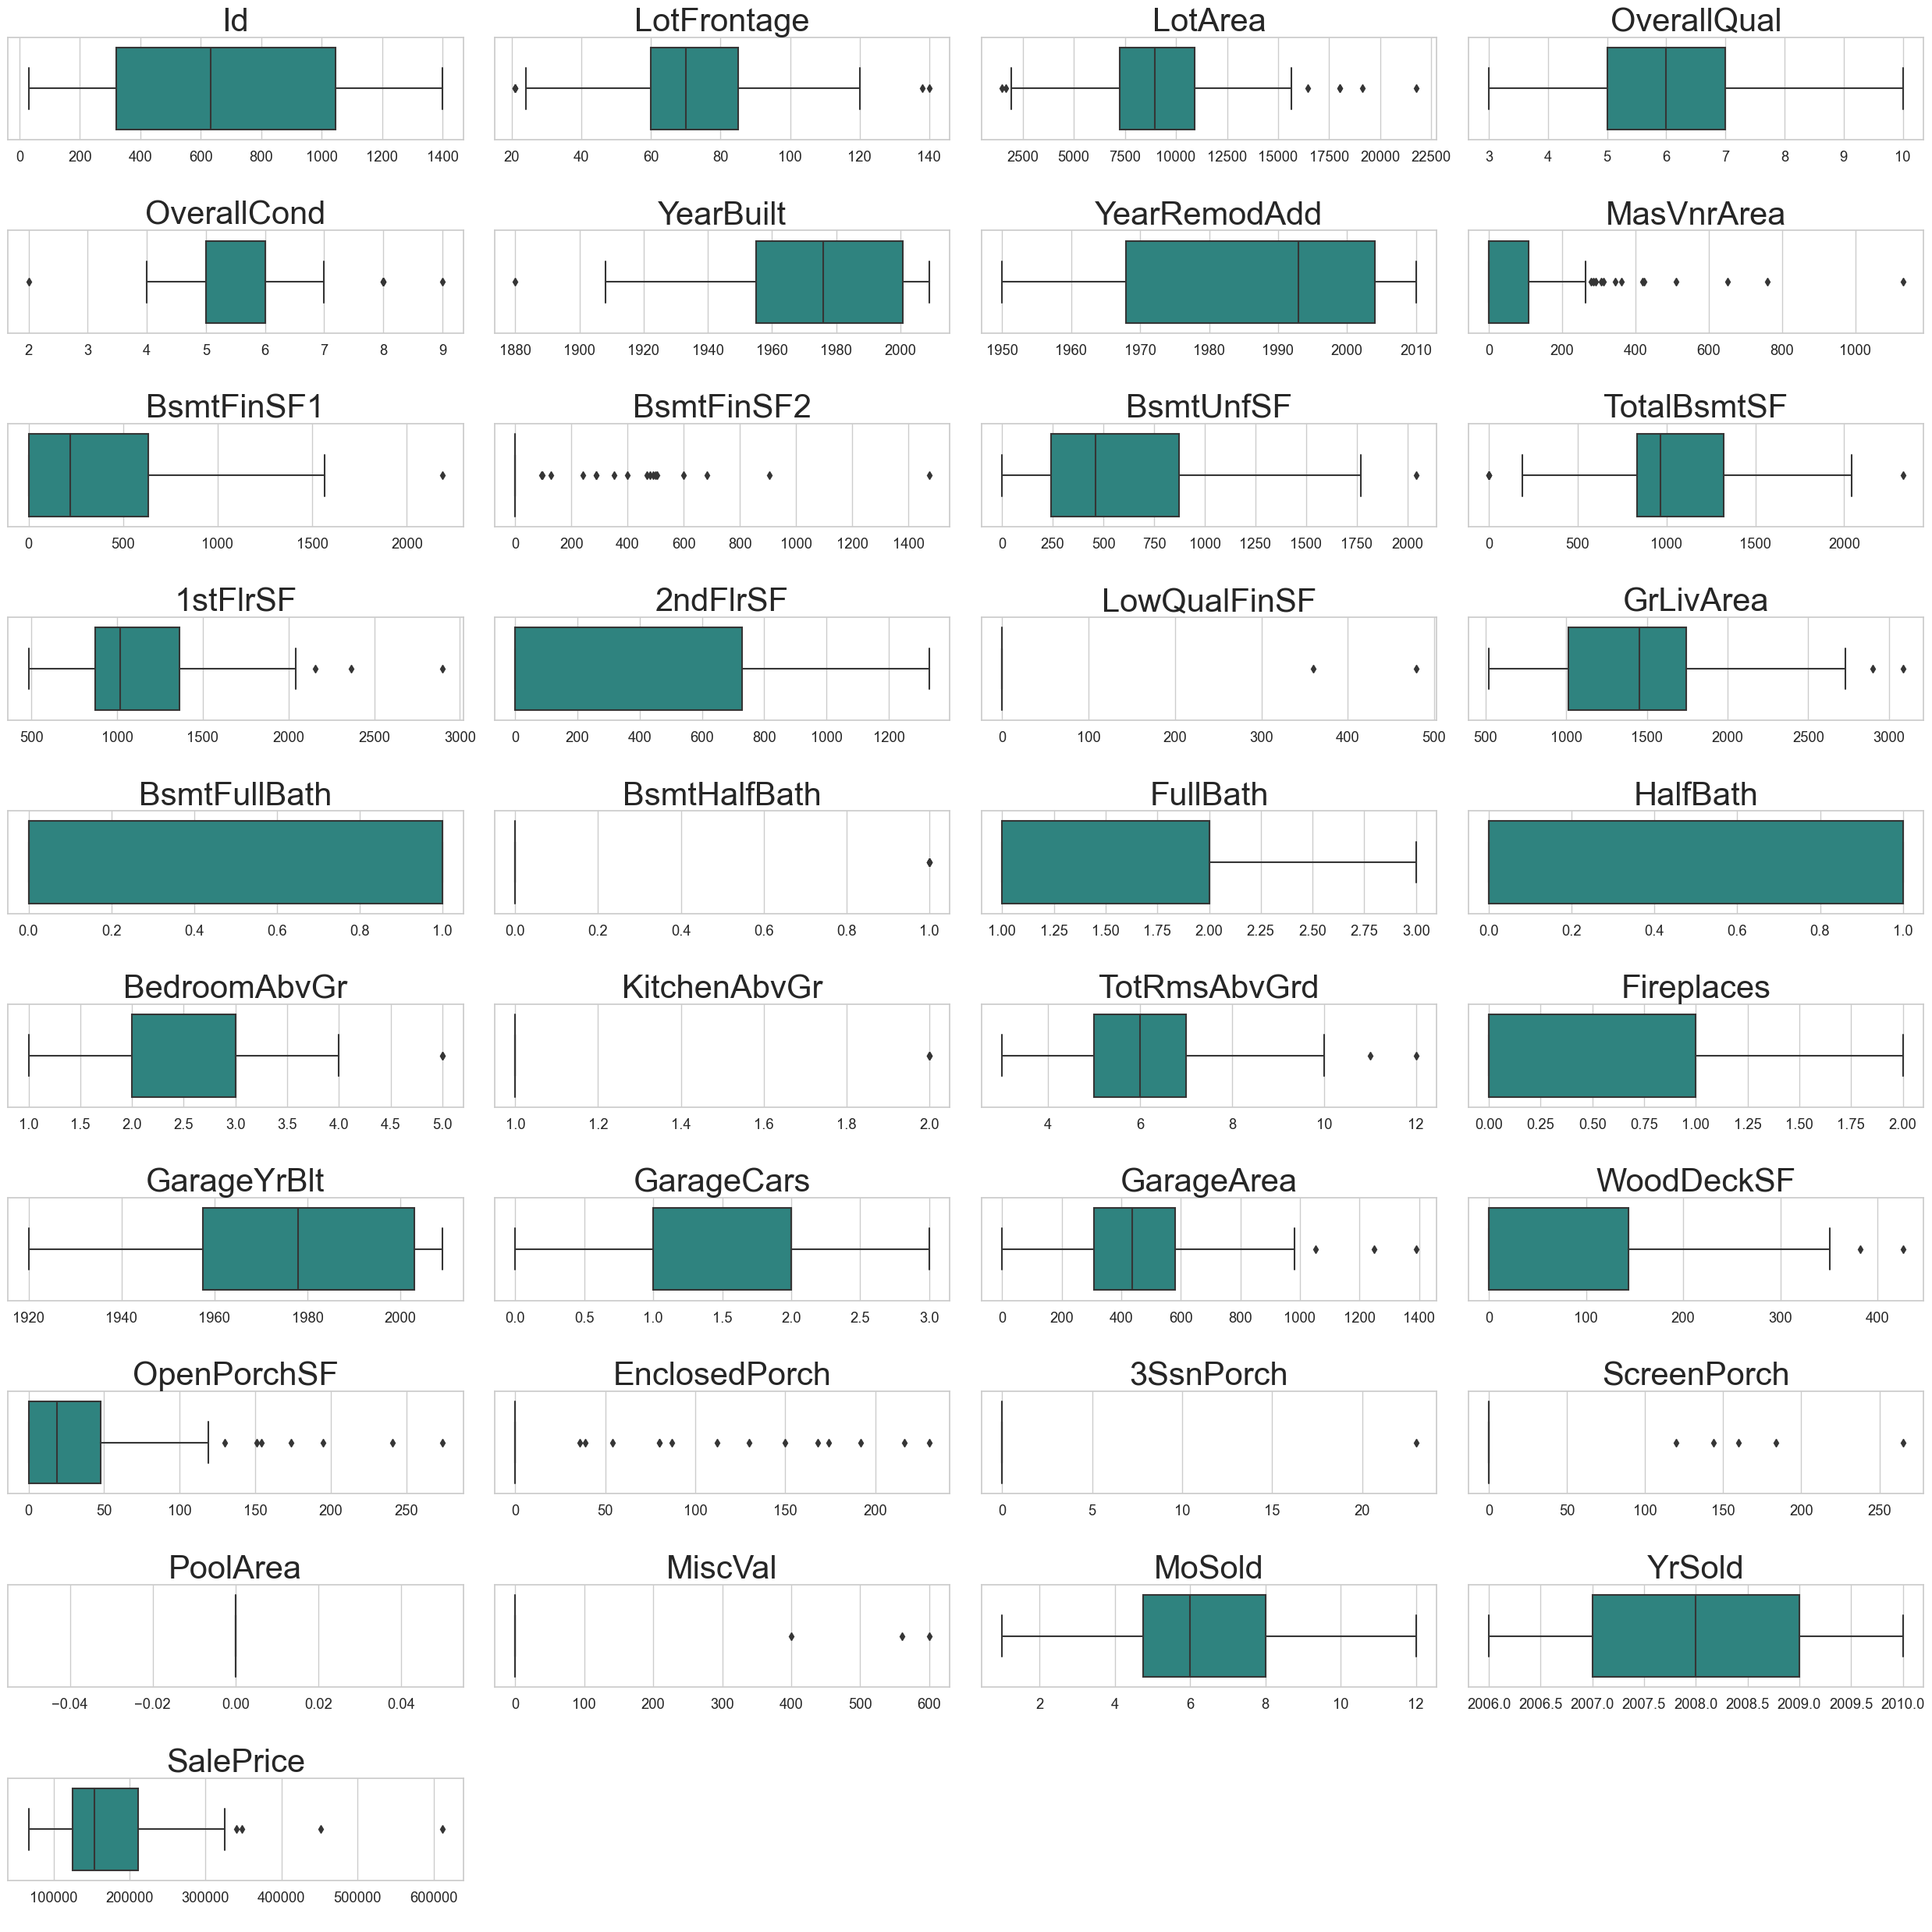

In [7]:
plt.figure(figsize=(25, 25))
for i in range(0, len(numerical_features)):
    plt.subplot(10, 4, i+1)
    sns.boxplot(x = df[numerical_features[i]], palette = 'viridis')
    plt.title(numerical_features[i], fontsize = 30)
    plt.xlabel(' ')
    plt.tight_layout()

##### For categorical features

In [8]:
categorical_features = df.select_dtypes(include='object').columns
categorical_features

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
len(categorical_features)

44

ValueError: min() arg is an empty sequence

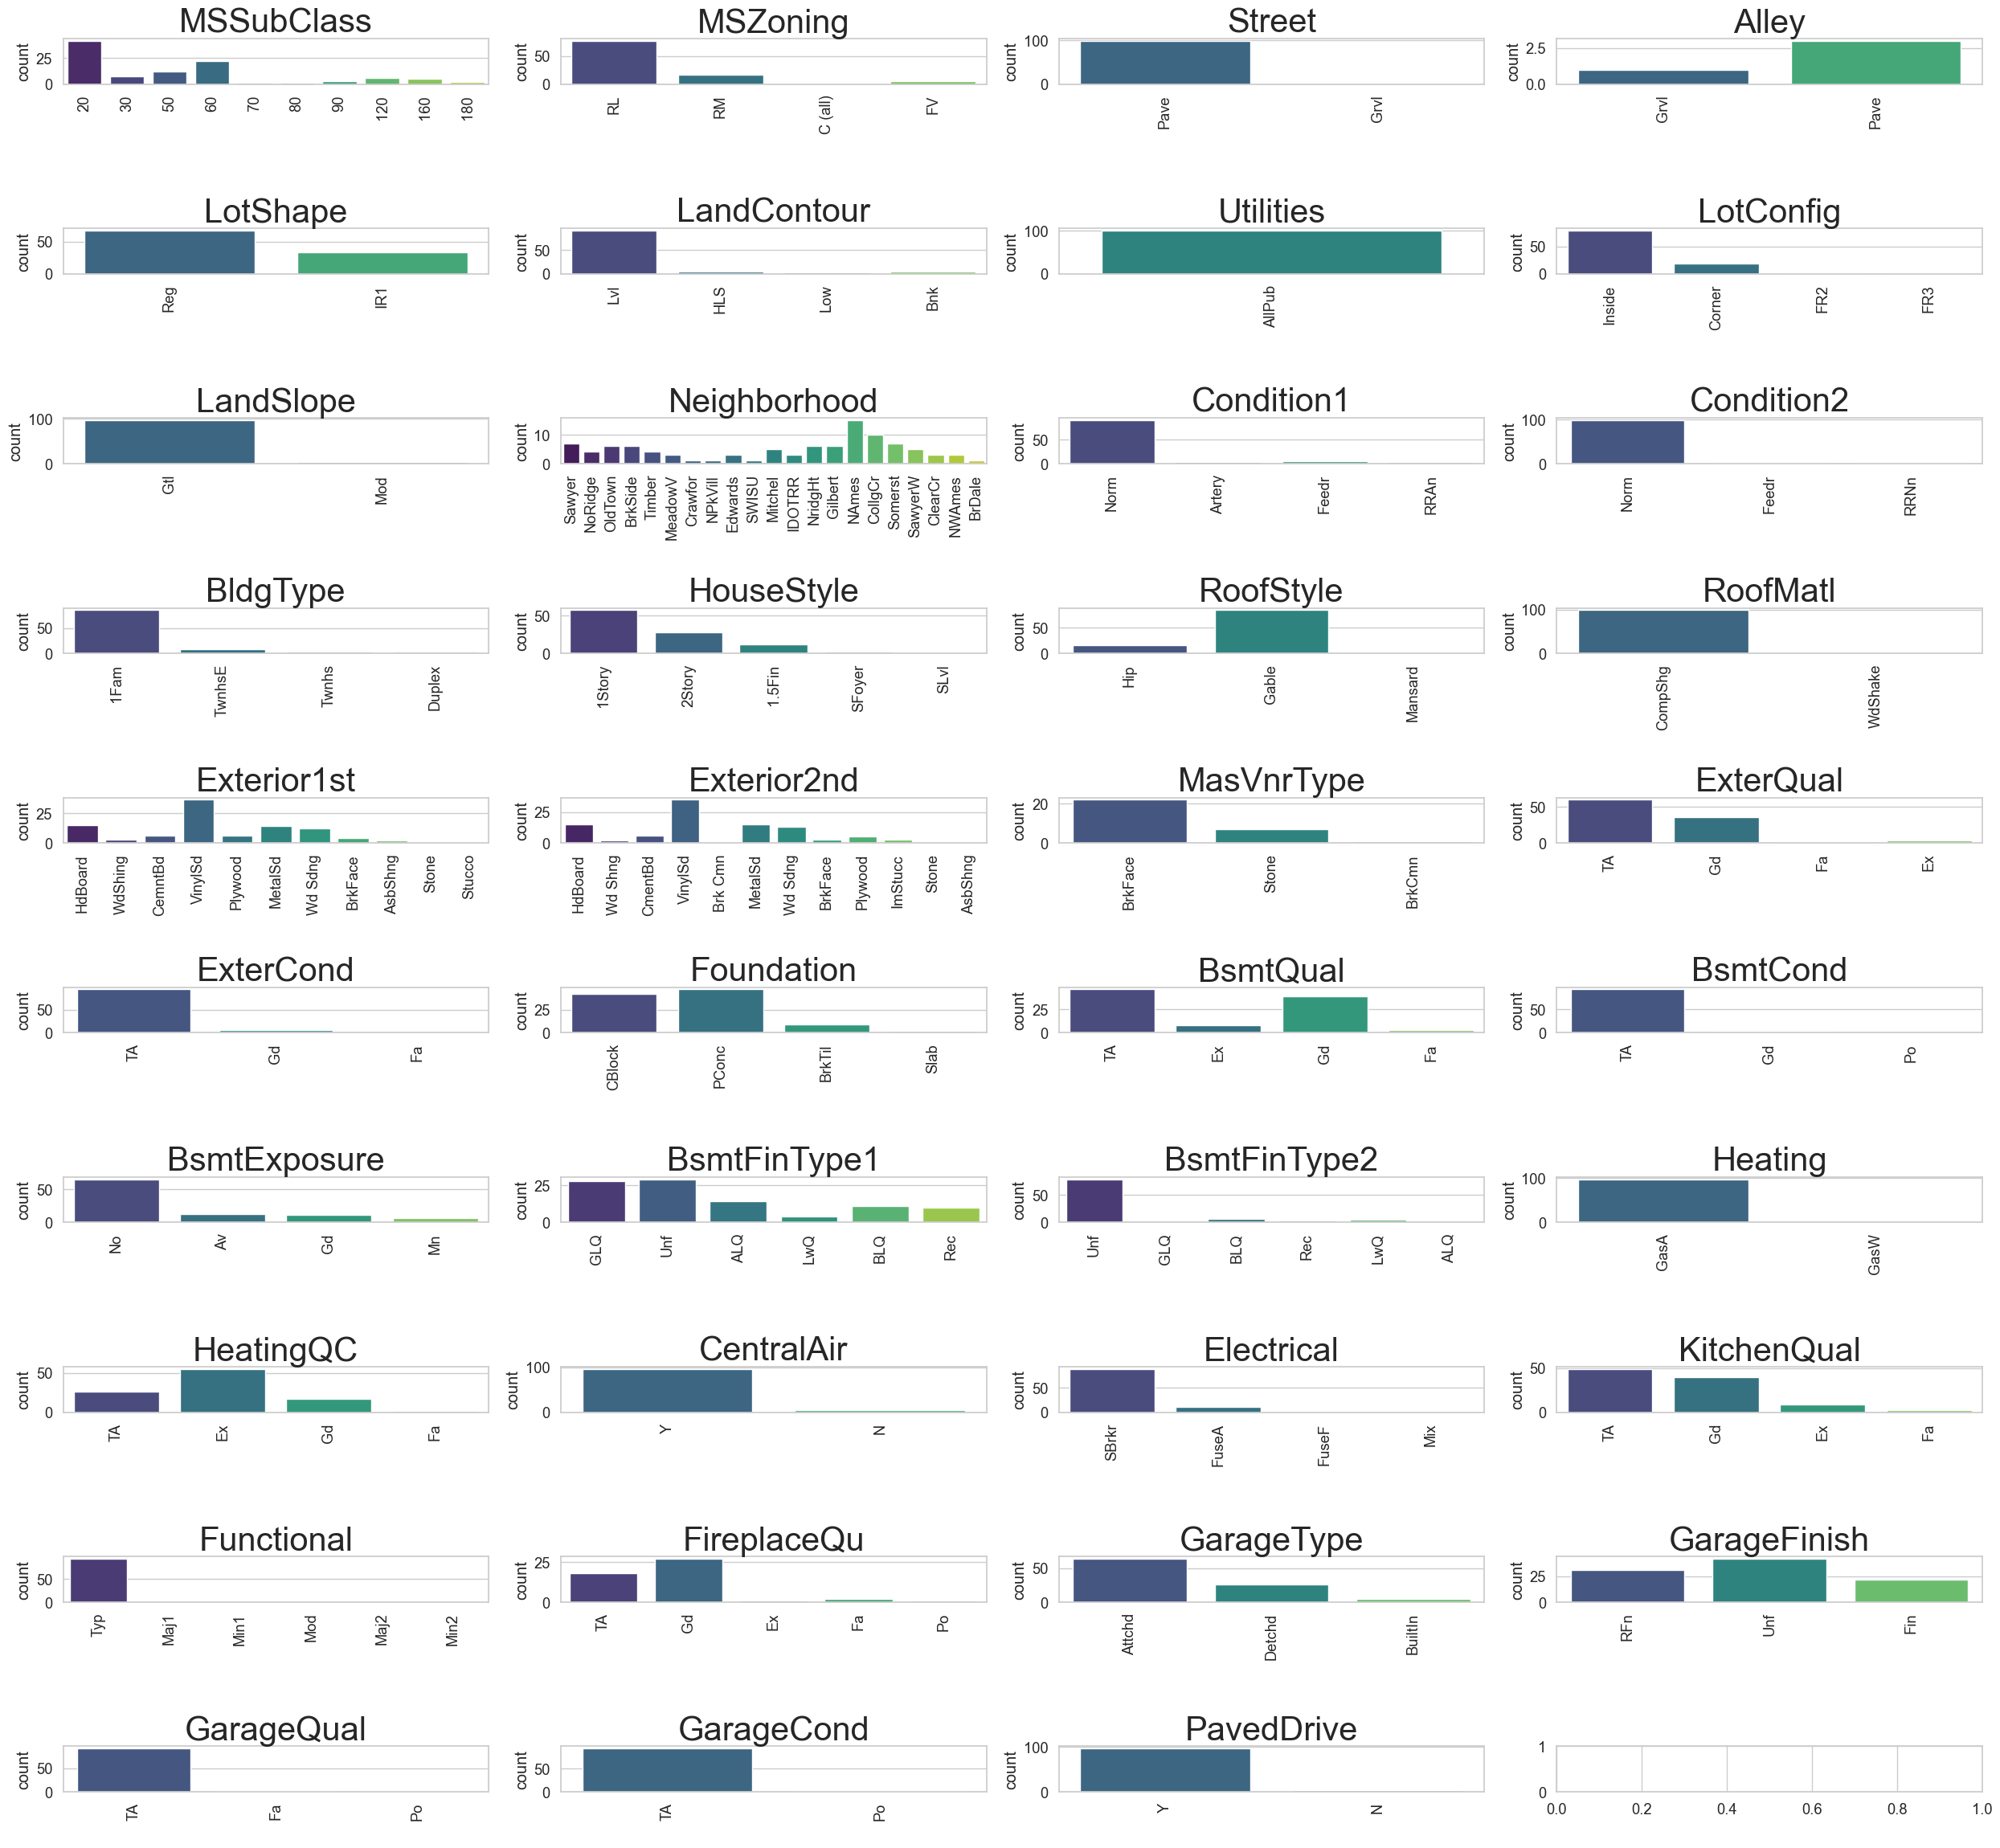

In [10]:
plt.figure(figsize=(25, 25))
for i in range(0, len(categorical_features)):
    plt.subplot(11, 4, i+1)
    sns.countplot(x = df[categorical_features[i]], palette = 'viridis')
    plt.title(categorical_features[i], fontsize = 30)
    plt.xlabel(' ')
    plt.xticks(rotation=90)
    plt.tight_layout()

- We can already note the some features are very imbalanced and consists mostly of one variable. We'll deal with these later.

<a id='sec1.2'></a>
### [1.2 Bi-Variate Analysis](#sec1.2)

Bi-variate analysis looks at 2 different features to identify any possible relationship or distinctive patterns between the 2 features. We are going to compare all the features with the target variable SalePrice 

### Numerical Columns: Correlation Matrix

- One of the commonly used techniques for Bi-variate analysis between numerical values the  **Correlation Matrix**. Correlation matrix is an effective tool to uncover linear relationship (Correlation) between any 2 continuous features.

In [ ]:
## Correlation matrix of numerical features
plt.figure(figsize=(48, 20))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

We can see the the correlations with the Target  variable in the last row

### Categorical Columns vs SalePrice

In [ ]:
# Box Plot: SalePrice distribution across different categories
plt.figure(figsize=(25, 88))  # Reduce figure size for better visibility
for i in range(0, len(categorical_features)):
    plt.subplot(11, 4, i+1)  # Adjust grid to 11x4 (or whatever fits best)
    sns.boxplot(x=categorical_features[i], y='SalePrice', data=df, palette='viridis')
    plt.title(f'SalePrice vs. {categorical_features[i]}', fontsize=15)
    plt.xlabel(categorical_features[i], fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.ylabel('SalePrice', fontsize=12)  # Add y-axis label for clarity

# Apply tight_layout after all subplots are created
plt.tight_layout()
plt.show()

Here we can check whether the distribution of price between different categories are distinct enough.

<a id = 'sec2'></a>
## [2. Data Processing](#sec2)

For preprocessing the House Prices dataset, we will cover the following:
1. Removing Redundant Features
2. Dealing with Outliers
3. Filling in missing values

<a id="sec2.1"></a>
### [2.1 Removing Redundant Features](#sec2.1)

### Features with alot of missing values

In [ ]:
missing_values = df.isnull().sum()

# Filter for columns with more than 400 missing values
missing_values[missing_values > 400].sort_values(ascending=False)

In [ ]:
df['MasVnrType'].value_counts()

In [ ]:
df['FireplaceQu'].value_counts()

- We'll drop the the first four features cos the missing values are just too much.
- We'll leave MasVnrType and FireplaceQu for now cos the categories seem to be satisfactorily distributed as seen in our univariate and bivariate analysis

In [ ]:
# Shape of the df before reduction
df.shape

In [ ]:
df.drop(['PoolQC','MiscFeature','Alley', 'Fence'], axis=1, inplace=True)

### Removing features that have mostly just 1 value

Here, we want to identify columns where a single value occupies the majority of the entries as observed during our univariate analysis. A common threshold is to consider dropping columns where the most frequent value constitutes more than 95% of the entries.

This approach ensures we retain only meaningful columns with sufficient variability for model training.

In [ ]:
# Threshold for dropping columns (95% of the values are the same)
threshold = 0.95

# Identify columns where the most frequent value exceeds the threshold
columns_to_drop = [col for col in df.columns if (df[col].value_counts(normalize=True).max() > threshold)]

# Print columns that will be dropped
print(f"Columns to drop (more than {threshold*100}% of the same value):\n", columns_to_drop)

In [ ]:
# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)

### Useless features in predicting SalePrice
- **Numerical Features**:
 Falling back to our Correlation Matrix, we will also remove features that do not have a strong enough relationship with target `SalePrice`.

In [ ]:
numerical_features = df.select_dtypes(include='number').columns
correlation = df[numerical_features].corr().apply(abs)
correlation = correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)
correlation

- Features with very low correlation (close to 0) are unlikely to contribute significantly to our regression model and may introduce noise or overfitting, So we may want to drop them.
- However, some features might have non-linear relationships with `SalePrice`, so let's check with a scatterplot.

In [ ]:
# Set a threshold for low correlation (e.g., absolute correlation < 0.1)
threshold = 0.1

# Filter the column names that have an absolute correlation with SalePrice below the threshold
low_corr_columns = correlation[correlation['SalePrice']< threshold].index.tolist()

# Print the list of columns with low correlation
print(f"Columns with correlation less than {threshold}:\n", low_corr_columns)

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Plot scatter plots and polynomial regression line for each feature with low correlation
for col in low_corr_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    
    # Fit a polynomial of degree 2 (quadratic) for non-linear trend
    p = np.poly1d(np.polyfit(df[col], df['SalePrice'], 2))
    plt.plot(df[col], p(df[col]), color='red', linewidth=2)
    
    plt.title(f'SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

From the scatter plots we see that there's no polynomial relationship either, so we drop.

In [ ]:
# Drop the columns
df = df.drop(columns=low_corr_columns)

**Categorical Features:** Falling back to our boxpolts, we will also remove features where the distribution of price between the different categories have a significant overlap, cos they would not be a good predictor of price.

In [ ]:
overlap_columns = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BsmtFinType2']

# Drop the columns
df = df.drop(columns=overlap_columns)

In [ ]:
# Verify the shape of the new DataFrame
print(f"Reduced DataFrame shape: {df.shape}")

<a id="sec2.2"></a>
### [2.2 Dealing with Outliers](#sec2.2)

***This is optional as several models are not affected by outliers***

**The `Z-Score` is one method that we can use to detect outliers**

- The Z-score indicates how many standard deviations a data point is from the mean. You can remove data points that have a Z-score above a threshold (usually ±3).

- This approach involves calculating the Z-scores for each numerical column, and then removing rows where the Z-score for any column is above a certain threshold (commonly 3).

In [ ]:
numerical_features = df.select_dtypes(include='number').columns
numerical_features

In [ ]:
# Import zscore
from scipy.stats import zscore


# Calculate Z-scores for all numerical columns
z_scores = df[numerical_features].apply(zscore)

# Set the Z-score threshold for detecting outliers (commonly 3 or -3)
threshold = 3

# Remove outliers per column (not requiring all to be below threshold)
for col in numerical_features:
    df_no_outliers = df[(z_scores[col] < threshold) & (z_scores[col] > -threshold)]

# Print the shape of the DataFrame before and after removing outliers
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

# The DataFrame df now has outliers removed on a per-column basis

<a id="sec2.3"></a>
### [2.3 Filling Missing Values](#sec2.3)

For the missing values, we will fill missing values for all columns based on the Neighborhood column
- Numerical columns: Fill missing values using the mean within each Neighborhood.
- Categorical columns: Fill missing values using the most frequent category (mode) within each Neighborhood.

In [ ]:
categorical_features = df.select_dtypes(include='object').columns
categorical_features

In [ ]:
# Fill missing values for numerical columns using mean within each 'Neighborhood'
for col in numerical_features:
    if df[col].isnull().sum() > 0:  # Only apply to columns with missing values
        df[col] = df.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.mean()))

# Fill missing values for categorical columns using mode within each 'Neighborhood'
for col in categorical_features:
    if df[col].isnull().sum() > 0:  # Only apply to columns with missing values
        df[col] = df.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Check for any remaining missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


In [ ]:
# Replace all missing values in MasVnrType with the most frequent value in the column.
df["MasVnrType"] = df["MasVnrType"].fillna(df["MasVnrType"].mode()[0])

# Check for any remaining missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

### Mapping Ordinal Features (Label encoding)
There are some columns which are ordinal by nature, which represents the quality or condition of certain housing features. In this case, we will map the respective strings to a value. The better the quality, the higher the value

In [ ]:
categorical_features 

In [ ]:
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

In [ ]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','FireplaceQu']
for col in ord_col:
    df[col] = df[col].map(ordinal_map)
    
fin_col = ['BsmtFinType1']
for col in fin_col:
    df['BsmtFinType1'] = df['BsmtFinType1'].map(fintype_map)

df['BsmtExposure'] = df['BsmtExposure'].map(expose_map)

After removing the outliers, and imputing missing values, we can now proceed with adding additional information for our model to train on. This is done by the means of - Feature Engineering.

<a id='sec3'><a>
## [3. Feature Engineering](#sec3)
Feature Engineering is a technique by which we create new features that could potentially aid in predicting our target variable, which in this case, is *SalePrice*. In this notebook, we will create additional features based on our **Domain Knowledge** of the housing features

Based on the current feature we have, the first additional featuire we can add would be **TotalLot**, which sums up both the *LotFrontage* and *LotArea* to identify the total area of land available as lot. We can also calculate the total number of surface area of the house, **TotalSF** by adding the area from basement and 2nd floor. **TotalBath** can also be used to tell us in total how many bathrooms are there in the house. We can also add all the different types of porches around the house and generalise into a total porch area, **TotalPorch**.  
* TotalLot = LotFrontage + LotArea
* TotalSF = TotalBsmtSF + 2ndFlrSF
* TotalBath = FullBath + HalfBath
* TotalPorch = OpenPorchSF + EnclosedPorch + ScreenPorch 
* TotalBsmtFin = BsmtFinSF1 + BsmtFinSF2

In [ ]:
df['TotalLot'] = df['LotFrontage'] + df['LotArea']
df['TotalSF'] = df['TotalBsmtSF'] + df['2ndFlrSF']
df['TotalBath'] = df['FullBath'] + df['HalfBath']
df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch']

### Binary Columns
We also include simple feature engineering by creating binary columns for some features that can indicate the **presence(1) / absence(0)** of some features of the house

In [ ]:
column = ['MasVnrArea','TotalBsmtSF','2ndFlrSF','WoodDeckSF','TotalPorch']

for col in column:
    col_name = col+'_bin'
    df[col_name] = df[col].apply(lambda x: 1 if x > 0 else 0)
    
df

### Converting Categorical to Numerical
Lastly, because machine learning only learns from data that is numerical in nature, we will convert the remaining categorical columns into *one-hot* features using the *get_dummies()* method into numerical columns that is suitable for feeding into our machine learning algorithm.

In [ ]:
df = pd.get_dummies(df)
df.head()

### SalePrice Distribution

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Before transformation of SalePrice")
dist = sns.distplot(df['SalePrice'],norm_hist=False)

Distribution is skewed to the right, where the tail on the curve’s right-hand side is longer than the tail on the left-hand side, and the mean is greater than the mode. This situation is also called positive skewness.  
Having a skewed target will affect the overall performance of our machine learning model, thus, one way to alleviate will be to using **log transformation** on skewed target, in our case, the *SalePrice* to reduce the skewness of the distribution.

In [ ]:
plt.figure(figsize=(10,6))
plt.title("After transformation of SalePrice")
dist = sns.distplot(np.log(df['SalePrice']),norm_hist=False)

In [ ]:
df["SalePrice"] = np.log(df['SalePrice'])

Now that we are satisfied with our final data, we will proceed to the part where we will solve this regression problem - Modeling

<a id='sec4'></a>
## [4. Modeling](#sec4)
This section will consist of scaling the data for better optimization in our training, and also introducing the varieties of ensembling methods that are used in this notebook for predicting the Housing price. We also try out hyperparameter tuning briefly, as i will be dedicating a new notebook that will explain more in details on the process of Hyperparameter Tuning as well as the mathematical aspect of the ensemble algorithms.

### Separate features (X) and target (y)

In [ ]:
X = df.drop(columns=['SalePrice'])  # Drop the target column to get features
y = df['SalePrice']  # Select the target column

### Split the data into training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id='sec4.1'></a>
### [4.1 Scaling of Data](#sec4.1)
- Scaling ensures that each feature contributes equally to the distance calculations or the optimization process. 
- We'll use **Standardization** here.  Standardization transforms the features to have a mean of 0 and a standard deviation of 1. This is useful when the features have different units or scales.


In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

<a id='sec4.2'></a>
## [4.2 Selecting Algorithms](#sec4.2)

#### 1. Linear Regression

In [ ]:
# Initialize the model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_lr = lin_reg.predict(X_test_scaled)

# Model evaluation
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

#### 2. Elastic Net regression

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize the Elastic Net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Fit the model
elastic_net.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_en = elastic_net.predict(X_test_scaled)

# Model evaluation
print("Elastic Net RMSE:", mean_squared_error(y_test, y_pred_en, squared=False))
print("Elastic Net R2 Score:", r2_score(y_test, y_pred_en))


#### 3. Decision Tree Regression

In [ ]:
# Initialize the model with some parameters
tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

# Fit the model
tree_reg.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_tree = tree_reg.predict(X_test_scaled)

# Model evaluation
print("Decision Tree RMSE:", mean_squared_error(y_test, y_pred_tree, squared=False))
print("Decision Tree R2 Score:", r2_score(y_test, y_pred_tree))

#### 4. Random Forest Regression

In [ ]:
# Initialize the model with some parameters
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

# Fit the model
rf_reg.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_rf = rf_reg.predict(X_test_scaled)

# Model evaluation
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

#### 5. Support Vector Regression (SVR)

In [ ]:
# Initialize the model with some parameters
svr_reg = SVR(kernel='rbf', C=100, epsilon=0.1)

# Fit the model
svr_reg.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_svr = svr_reg.predict(X_test_scaled)

# Model evaluation
print("SVR RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))
print("SVR R2 Score:", r2_score(y_test, y_pred_svr))

#### 6. XGBoost  (eXtreme Gradient Boosting)  Regression

In [ ]:
# Initialize the model with some parameters
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6)

# Fit the model
xgb_reg.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_xgb = xgb_reg.predict(X_test_scaled)

# Model evaluation
print("XGBoost RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))
print("XGBoost R2 Score:", r2_score(y_test, y_pred_xgb))


#### 7. LightGBM (Light Gradient Boosting Machine)

In [ ]:
# pip install --upgrade pandas dask bottleneck

# Install lightgbm
!pip install lightgbm

# Importing LightGBM
import lightgbm as lgb

In [ ]:
# Initialize the LightGBM model with some parameters
lgb_reg = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05, max_depth=6)

# Fit the model
lgb_reg.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_lgb = lgb_reg.predict(X_test_scaled)

# Model evaluation
print("LightGBM RMSE:", mean_squared_error(y_test, y_pred_lgb, squared=False))
print("LightGBM R2 Score:", r2_score(y_test, y_pred_lgb))


### With Cross Validation

- Cross-validation is a method to evaluate a model by splitting the data into multiple parts, training and testing the model on different subsets in each round, and then averaging the results. This helps ensure the model's performance is reliable and not just specific to one split of the data.

- We'll use XGBoost as our model

In [ ]:
# Import the necessary functions from scikit-learn
from sklearn.metrics import make_scorer  # To create custom scoring functions
from sklearn.model_selection import cross_validate  # To perform cross-validation

In [1]:
# Initialize the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)

# Create custom scorers for RMSE and R²
# `make_scorer` allows using custom metrics or built-in metrics in cross-validation
rmse_scorer = make_scorer(mean_squared_error, squared=False)
r2_scorer = make_scorer(r2_score)

# Dictionary of scoring metrics
scoring = {'RMSE': rmse_scorer, 'R2': r2_scorer}

# Perform cross-validation
# `cross_validate` splits the data into folds, trains and tests the model, and calculates the scores
cv_results = cross_validate(model, X, y, scoring=scoring, cv=5, return_train_score=True)
# Note that we are using X and y and not X_train and y_train

# Output the results
# `cv_results` contains the scores for each fold
print("RMSE scores:", cv_results['test_RMSE'])  # RMSE scores for each fold
print("R² scores:", cv_results['test_R2'])  # R² scores for each fold
print("Average RMSE:", cv_results['test_RMSE'].mean())  # Average RMSE across all folds
print("Average R²:", cv_results['test_R2'].mean())  # Average R² score across all folds


NameError: name 'xgb' is not defined

### Hyperparameter Tuning with Loops

- Hyperparameter tuning is the process of finding the best settings for a machine learning model to improve its performance.
- Think of it like adjusting the knobs on a machine to make it work better. 
- You test different combinations of settings (hyperparameters) and evaluate how well the model performs with each set. The goal is to find the combination that leads to the best results, such as higher accuracy or lower error rates.

In [ ]:
# We'll use XGBoost and tune the n_estimators, learning_rate, and max_depth.

# Initialize the best RMSE and best R² to extreme values to ensure any calculated values will be better
best_rmse = float('inf')
best_r2 = -float('inf')
best_params = {}

# Iterate over different values for n_estimators, learning_rate, and max_depth
for n_estimators in [50, 100, 200]:  # Number of boosting rounds
    for learning_rate in [0.01, 0.1, 0.2]:  # Step size at each iteration
        for max_depth in range(3, 10, 2):  # Maximum depth of each tree

            # Initialize the XGBoost model with the current set of hyperparameters
            xgb_reg = xgb.XGBRegressor(
                n_estimators=n_estimators,       # Number of boosting rounds
                learning_rate=learning_rate,     # Step size at each iteration
                max_depth=max_depth,             # Maximum depth of each tree
                random_state=42                  # Ensures reproducibility
            )
            
            # Train the model using the training data
            xgb_reg.fit(X_train, y_train)
            
            # Predict the target values for the test data
            y_pred_xgb = xgb_reg.predict(X_test)
            
            # Calculate Root Mean Squared Error (RMSE) and R² score for the current model
            rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
            r2 = r2_score(y_test, y_pred_xgb)
            
            # Check if the current RMSE is better (lower) than the best RMSE so far
            if rmse < best_rmse:
                # Update the best RMSE, R² score, and the best parameters
                best_rmse = rmse
                best_r2 = r2
                best_params = {
                    'n_estimators': n_estimators, 
                    'learning_rate': learning_rate, 
                    'max_depth': max_depth
                }

# Print the best hyperparameters and corresponding RMSE and R² score
print("Best Parameters for XGBoost:", best_params)
print("Best RMSE for XGBoost:", best_rmse)
print("Best R² Score for XGBoost:", best_r2)

#### LightBGM

In [ ]:
# Try with LightBGM

### Hyperparameter Tuning with `GridSearchCV` (GridSearch Cross Validation)

- `GridSearchCV` is a technique used to optimize machine learning models by systematically evaluating all possible combinations of specified hyperparameters.
- `GridSearchCV` combines grid search and cross-validation into a single tool.

In [ ]:
from sklearn.model_selection import GridSearchCV

#### XGBoost Hyperparameter tuning

##### Simple (This will take some time...)

In [ ]:
# Initialize the XGBoost model with default settings
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],    # Step size at each iteration
    'max_depth': [3, 5, 7, 9]             # Maximum depth of each tree
}

# Define custom scorers for RMSE and R²
rmse_scorer = make_scorer(mean_squared_error, squared=False)
r2_scorer = make_scorer(r2_score)

# Initialize GridSearchCV with multiple scoring metrics
grid_search = GridSearchCV(
    estimator=xgb_model,                 # Model to use
    param_grid=param_grid,               # Parameter grid to search
    scoring={'RMSE': rmse_scorer, 'R2': r2_scorer},  # Metrics to evaluate
    refit='RMSE',                        # Metric to optimize
    cv=5,                                # Number of cross-validation folds
    verbose=1                            # Level of verbosity for output
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_  # GridSearchCV minimizes the score
best_r2 = grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]

# Print the best hyperparameters and corresponding RMSE and R² score
print("Best Parameters for XGBoost:", best_params)
print("Best RMSE for XGBoost:", best_rmse)
print("Best R² Score for XGBoost:", best_r2)

##### More complex (Will take more time. Way more time)

In [ ]:
# Initialize the XGBoost model with default settings
xgb_model = xgb.XGBRegressor(booster='gbtree', objective='reg:squarederror')

# Define the parameter grid to search through
param_grid = {
    'learning_rate': [0.01, 0.1, 0.15, 0.3, 0.5],  # Learning rate (step size)
    'n_estimators': [100, 500, 1000, 2000, 3000],  # Number of boosting rounds
    'max_depth': [3, 6, 9],  # Maximum depth of trees
    'min_child_weight': [1, 5, 10, 20],  # Minimum sum of instance weight
    'reg_alpha': [0.001, 0.01, 0.1],  # L1 regularization term
    'reg_lambda': [0.001, 0.01, 0.1]  # L2 regularization term
}

# Set up GridSearchCV
xgb_reg = GridSearchCV(
    estimator=xgb_model,  # Model to use
    param_grid=param_grid,  # Parameter grid to search through
    scoring='neg_root_mean_squared_error',  # Scoring metric for evaluation
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Print progress messages
    n_jobs=-1  # Use all available cores for parallel processing
)

# Fit GridSearchCV to the training data
xgb_search = xgb_reg.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params = xgb_search.best_params_

# Initialize the XGBoost model with the best hyperparameters
xgb_best = xgb.XGBRegressor(**best_params)

print("Best Parameters for XGBoost:", best_params)

#### LightBGM Hyperparameter tuning

In [ ]:
# Try with LightBGM

In [ ]:
# Initialize the LightGBM model with default settings
lgbm = lgb.LGBMRegressor()

# Define the parameter grid to search over
param_grid = {
    'max_depth': [2, 5, 8, 10],  # Maximum depth of trees
    'learning_rate': [0.001, 0.01, 0.1, 0.2],  # Learning rate
    'n_estimators': [100, 300, 500, 1000, 1500],  # Number of boosting rounds
    'lambda_l1': [0.0001, 0.001, 0.01],  # L1 regularization term
    'lambda_l2': [0, 0.0001, 0.001, 0.01],  # L2 regularization term
    'feature_fraction': [0.4, 0.6, 0.8],  # Fraction of features used for training
    'min_child_samples': [5, 10, 20, 25]  # Minimum number of samples per leaf
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm,  # Model to use
    param_grid=param_grid,  # Grid of parameters to search
    scoring='neg_root_mean_squared_error',  # Scoring metric for evaluation
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available cores
    verbose=1  # Print progress messages
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
lgbm_best = lgb.LGBMRegressor(**best_params)

print("Best Parameters for LightGBM:", best_params)


#### Blending
**Blending** in machine learning combines predictions from multiple models to improve accuracy. You train different models, make predictions with each, and then combine these predictions (e.g., by averaging) to get a better overall result. This approach leverages the strengths of each model to enhance the final prediction

In [ ]:
def blend_models_predict(X, b, c):
    """
    Blend predictions from two models using weighted averaging.
    
    Parameters:
    X (array-like or DataFrame): The input features for making predictions.
    b (float): Weight for the XGBoost model's predictions.
    c (float): Weight for the LightGBM model's predictions.
    
    Returns:
    array: The blended predictions based on the weights provided.
    """
    # Get predictions from the XGBoost model
    xgb_preds = xgb.predict(X)
    
    # Get predictions from the LightGBM model
    lgbm_preds = lgbm.predict(X)
    
    # Compute the weighted average of the two sets of predictions
    blended_preds = (b * xgb_preds) + (c * lgbm_preds)
    
    return blended_preds

### To make a Kaggle submission

In [ ]:
# Make predictions on the test set using the blend_models_predict function
# Apply the exponential function to the predictions to transform them, if needed
subm = np.exp(blend_models_predict(test, 0.4, 0.3, 0.3))

# Create a DataFrame for the submission file
# 'Id' column contains the index from the test data
# 'SalePrice' column contains the transformed predictions
submission = pd.DataFrame({
    'Id': test.index,              # Test data index as unique identifier
    'SalePrice': subm              # Blended and transformed predictions
})

# Save the DataFrame to a CSV file for submission
# index=False ensures that the index column is not included in the CSV file
submission.to_csv("submission.csv", index=False)


#### Without comments

In [ ]:
 def blend_models_predict(X, b, c):
        return ((b* xgb.predict(X)) + (c * lgbm.predict(X))

In [ ]:
subm = np.exp(blend_models_predict(test, 0.4, 0.3, 0.3))
submission = pd.DataFrame({'Id': test.index,
                           'SalePrice': subm})

submission.to_csv("submission.csv", index=False)

---
_**Your Dataness**_,  
**`Obinna Oliseneku`** (_**Hybraid**_)  
**[LinkedIn](https://www.linkedin.com/in/obinnao/)** | **[GitHub](https://github.com/hybraid6)**  